## Reset Previous Work

In [1]:
from MERFISH_Objects.execute_class import *
import matplotlib.pyplot as plt
import shutil
import time
from tqdm import trange
import pandas as pd
from collections import Counter
import numpy as np
from Bio import SeqIO

import importlib
from dredFISH.Utils.__init__plots import *
# importlib.reload(MERFISH_Objects.execute_class)

2022-08-25 15:08:49,025 [INFO] WRITING LOG OUTPUT TO /home/fangming/.cellpose/run.log


In [2]:
cword_config = 'merfish_config_zebrafinch'
config = importlib.import_module(cword_config)

metadata_path = '/bigstore/Images2022/Gaby/Zebrafinch/Zebra_B0_2022Jul11/'
dataset = [i for i in metadata_path.split('/') if not i==''][-1]
parameters = config.parameters
fishdata_path = os.path.join(metadata_path, parameters['fishdata'])
utilities_path = parameters['utilities_path']
bitmap = config.bitmap

In [3]:
for key in parameters:
    if key.endswith('path') or key.endswith('data'):
        print(key, parameters[key])

daemon_path /scratch/test_daemon_FX
utilities_path /scratch/test_merfish_FX
fishdata fishdata_testFX


In [4]:
posname = '7-Pos004_003'
zindex = 0

# Process Single Position

In [8]:
%%time
self = Classify_Class(metadata_path,dataset,posname,zindex,cword_config,verbose=True)
self.parameters['spot_max_distance'] = 20
self.parameters['spot_minmass'] = 5
self.parameters['spot_diameter'] = 5
self.parameters['spot_separation'] = 5

self.call_spots()
self.pair_spots()
self.build_barcodes()
self.assign_codewords()
self.collapse_spots()

Calling Spots: 100%|██████████| 18/18 [00:43<00:00,  2.41s/it]
15:15:51 72984 Spots Found: 0it [00:00, ?it/s]
15:15:51 Pairing spots: 0it [00:00, ?it/s]
100%|██████████| 8/8 [00:00<00:00, 1251.75it/s]
15:16:54 53493 Spots Remaining: 0it [00:00, ?it/s]
15:16:54 23200 Potential Transcripts Found: 0it [00:00, ?it/s]
15:16:54 Building Barcodes: 0it [00:00, ?it/s]
15:16:54 Assigning Codewords: 0it [00:00, ?it/s]
Building Vector: 100%|██████████| 23200/23200 [00:27<00:00, 859.21it/s]
15:17:21 Updating Binary: 0it [00:00, ?it/s]
100%|██████████| 18/18 [00:00<00:00, 39.58it/s]
15:17:22 5997 Transcripts Found: 0it [00:00, ?it/s]
15:17:22 Collapsing Spots: 0it [00:00, ?it/s]
100%|██████████| 5997/5997 [02:01<00:00, 49.56it/s]


CPU times: user 4min 38s, sys: 22.9 s, total: 5min 1s
Wall time: 4min 15s


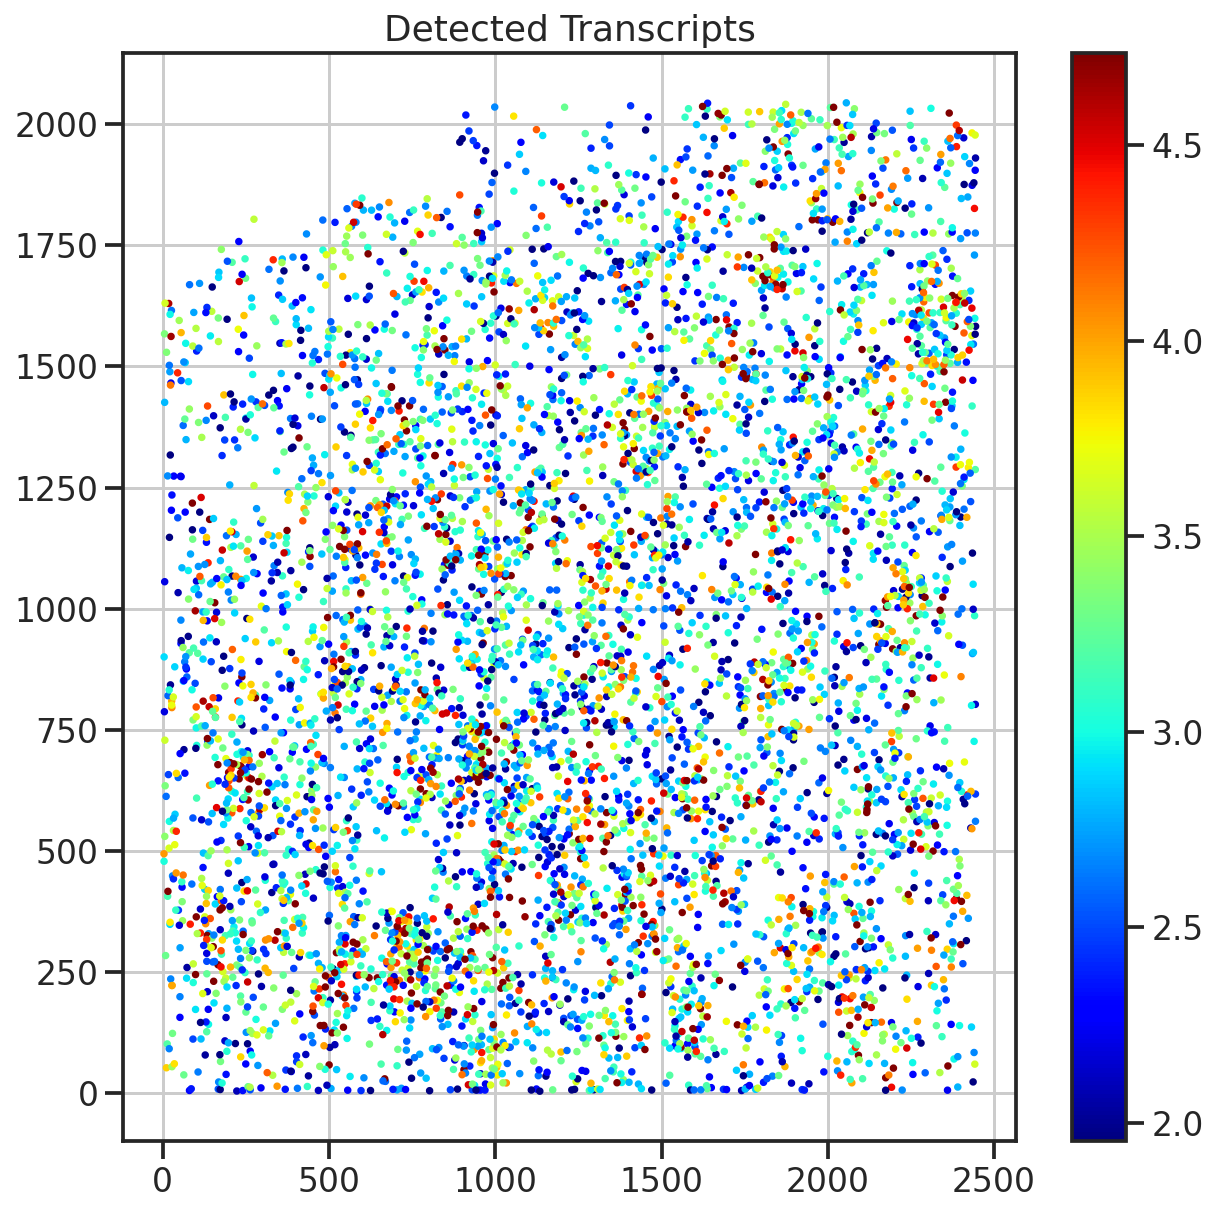

573


In [9]:
plt.figure(figsize=[10,10])
plt.title('Detected Transcripts')
c=self.transcripts['signal-noise'],
vmin,vmax= np.percentile(c,[5,95])
plt.scatter(self.transcripts.x,
            self.transcripts.y,
            c=c,
            s=5,
            vmin=vmin,
            vmax=vmax,
            cmap='jet')
plt.colorbar()
plt.show()

print(len([i for i in self.merfish_config.codebook.index[self.transcripts.cword_idx] if 'blank' in i]))
# print(len(spots))

# get everything

In [10]:
# self.bitmap
# self.barcodes.shape
# self.merfish_config.aids
codebook = self.merfish_config.codebook
codebook

,RS0095,RS0109,RS0175,RS0237,RS0307,RS0332,RS0384,RS0406,RS0451,RS0468,RS0548,RS64.0,RS156.0,RS278.0,RS313.0,RS643.0,RS740.0,RS810.0
FOXP4,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
AR,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
SLIT2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
DRD3,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
SATB2,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
blank12,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0
blank13,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
blank14,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
blank15,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0


In [11]:
spots = self.spots

transcripts = self.transcripts
transcripts['gene'] = codebook.index[transcripts.cword_idx]
transcripts_idx = transcripts['idx'].astype(int)

vectors = self.vectors

measured_barcodes = self.measured_barcodes.numpy()

updated_measured_barcodes = self.updatad_measured_barcodes.numpy()

print(
    spots.shape,
    transcripts.shape, 
    vectors.shape,
    measured_barcodes.shape,
    updated_measured_barcodes.shape,
)

(14939, 16) (5997, 44) (23200, 18) (23200, 18) (23200, 18)


In [12]:
print(
    np.all(measured_barcodes == updated_measured_barcodes),
    vectors[transcripts_idx].shape,
    updated_measured_barcodes[transcripts_idx].shape,
    measured_barcodes[transcripts_idx].shape,
)

False (5997, 18) (5997, 18) (5997, 18)


In [13]:
np.sum(updated_measured_barcodes[transcripts_idx] - measured_barcodes[transcripts_idx])

3939.0

In [14]:
transcripts.iloc[0]

y                     4.417633
x                    80.101795
mass                  5.375131
size                  1.161413
ecc                   0.241169
signal                3.265422
raw_mass             31.331169
ep                    0.069538
spot_diameter              5.0
spot_minmass               5.0
spot_separation            5.0
spot_max_distance         20.0
zindex                     0.0
label                      2.0
idx                        1.0
intensity             1.070065
dispersion            0.167598
bit0                  3.607143
bit1                  0.681818
bit2                      1.55
bit3                  2.230769
bit4                  1.173913
bit5                  1.628571
bit6                  1.590909
bit7                  1.181818
bit8                  0.318182
bit9                  1.238095
bit10                      4.0
bit11                     0.95
bit12                     -1.1
bit13                 0.545455
bit14                 2.590909
bit15   

In [15]:
cond = transcripts['gene'].str.contains("^blank")
A = transcripts[cond] #.shape, 
B = transcripts[~cond] #.shape
# Amean = A.mean()
# Bmean = B.mean()

A.shape, B.shape

((573, 44), (5424, 44))

In [16]:
len(A)/(len(B)+len(A))

0.09554777388694347

In [17]:
# which ones to look at?

# test
- 

<AxesSubplot:ylabel='Count'>

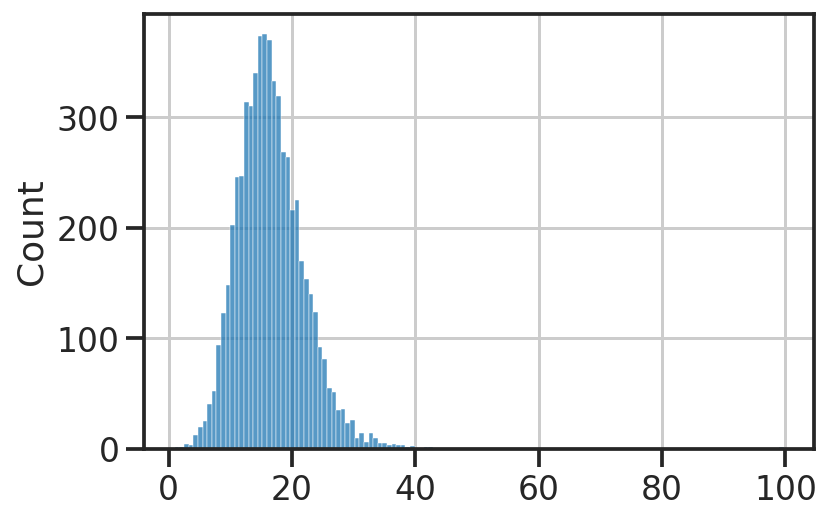

In [18]:
sns.histplot(vectors[transcripts_idx].sum(axis=1))

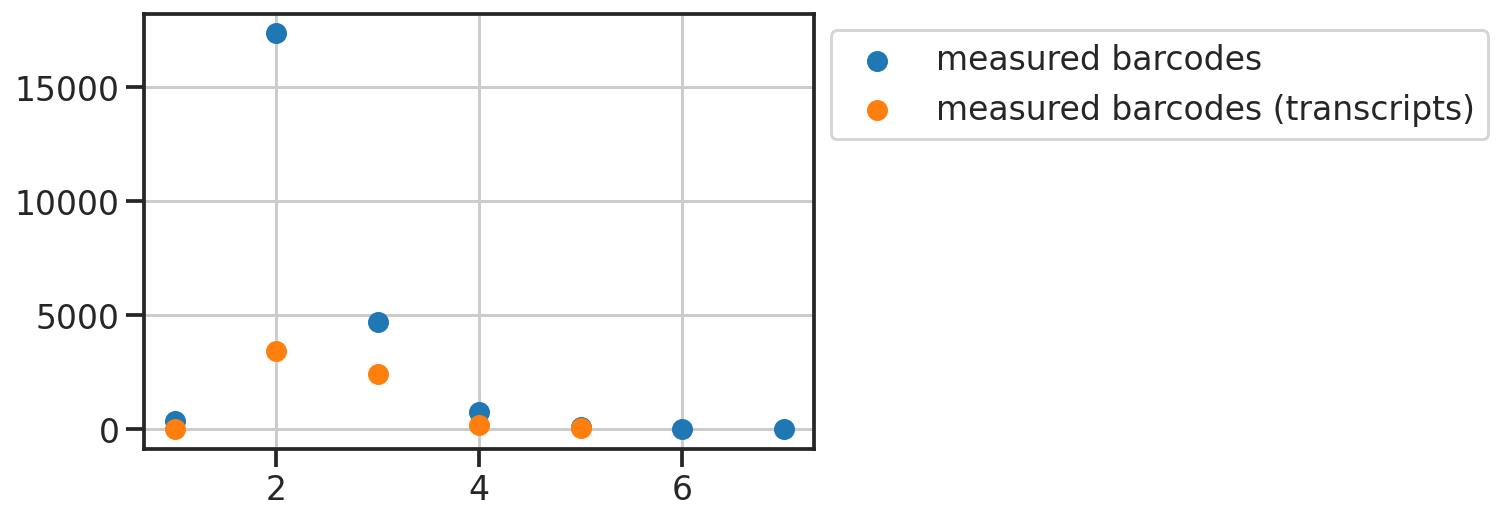

In [19]:
val = measured_barcodes.sum(axis=1).astype(int)
numpos, counts = np.unique(val, return_counts=True)
plt.scatter(numpos, counts, label='measured barcodes')

val = measured_barcodes[transcripts_idx].sum(axis=1).astype(int)
numpos, counts = np.unique(val, return_counts=True)
plt.scatter(numpos, counts, label='measured barcodes (transcripts)')

plt.legend(bbox_to_anchor=(1,1))

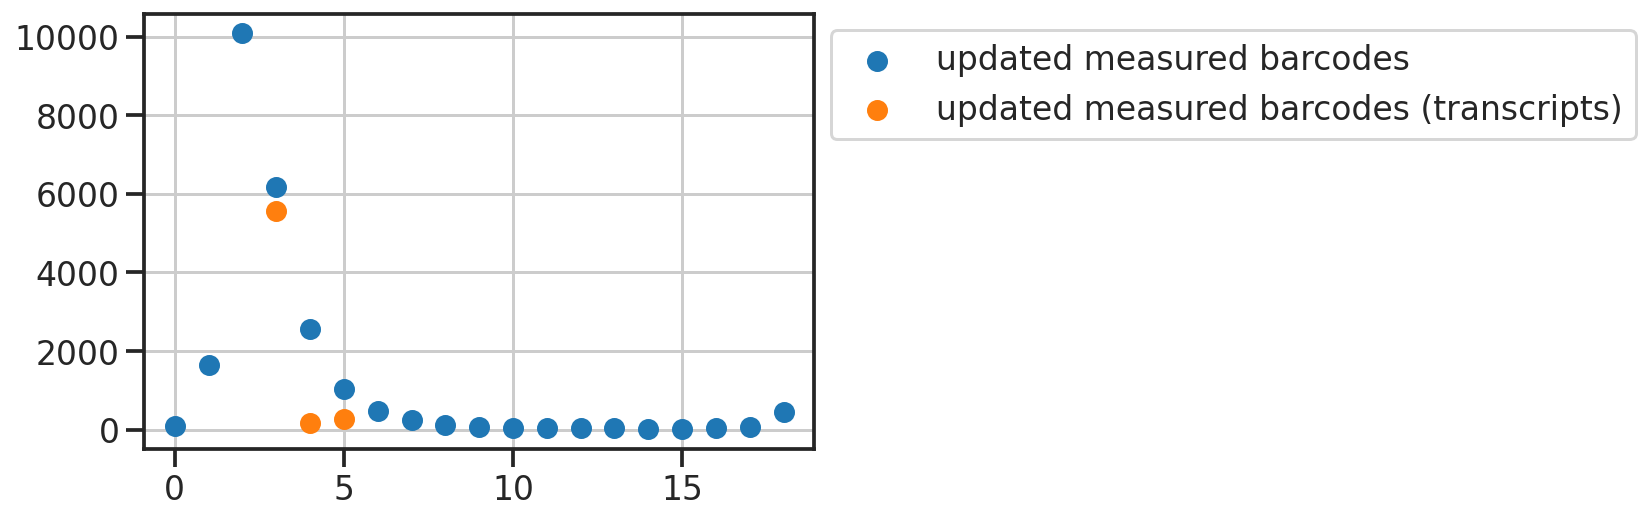

In [20]:
val = updated_measured_barcodes.sum(axis=1).astype(int)
numpos, counts = np.unique(val, return_counts=True)
plt.scatter(numpos, counts, label='updated measured barcodes')

val = updated_measured_barcodes[transcripts_idx].sum(axis=1).astype(int)
numpos, counts = np.unique(val, return_counts=True)
plt.scatter(numpos, counts, label='updated measured barcodes (transcripts)')

plt.legend(bbox_to_anchor=(1,1))

In [21]:
updated_measured_barcodes.sum(0) - measured_barcodes.sum(0)

array([ 986.,  961., 1115.,  776., 1026.,  738., 1204., 1496., 1489.,
       1670., 1397., 1391., 1186., 1106., 1202., 1197.,  998., 1313.],
      dtype=float32)

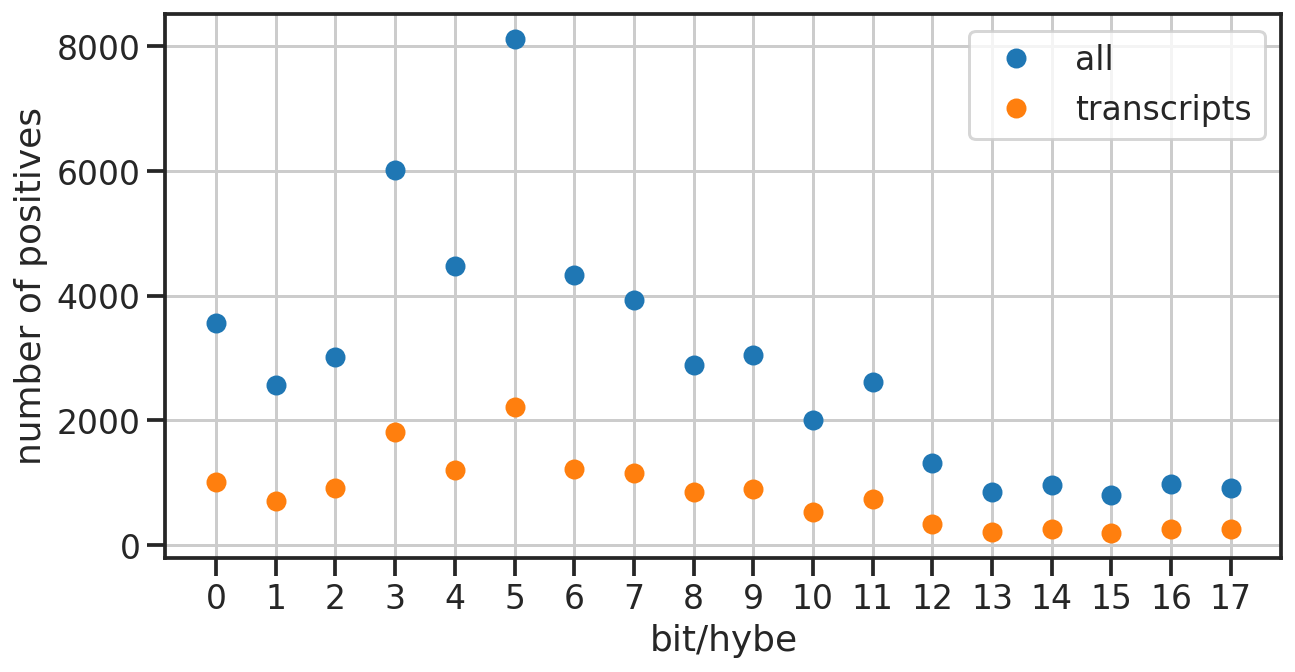

In [22]:
plt.figure(figsize=(10,5))
val = measured_barcodes.sum(axis=0).astype(int)
plt.plot(val, 'o', label='all')

val = measured_barcodes[transcripts_idx].sum(axis=0).astype(int)
plt.plot(val, 'o', label='transcripts')

plt.xticks(np.arange(18))
plt.xlabel('bit/hybe')
plt.ylabel('number of positives')
plt.legend()
plt.show()

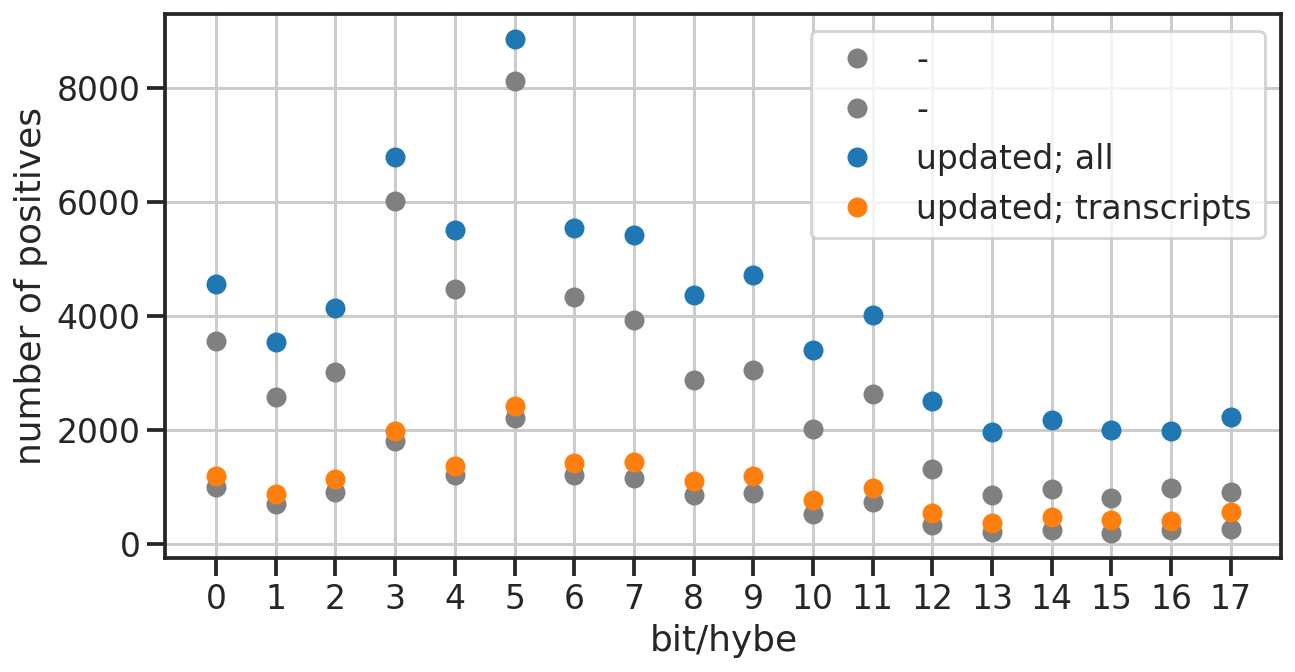

In [23]:
plt.figure(figsize=(10,5))
val = measured_barcodes.sum(axis=0).astype(int)
plt.plot(val, 'o', color='gray', label='-')

val = measured_barcodes[transcripts_idx].sum(axis=0).astype(int)
plt.plot(val, 'o', color='gray', label='-')

val = updated_measured_barcodes.sum(axis=0).astype(int)
plt.plot(val, 'o', label='updated; all')

val = updated_measured_barcodes[transcripts_idx].sum(axis=0).astype(int)
plt.plot(val, 'o', label='updated; transcripts')

plt.xticks(np.arange(18))
plt.xlabel('bit/hybe')
plt.ylabel('number of positives')
plt.legend()
plt.show()

(5997, 18)


<AxesSubplot:>

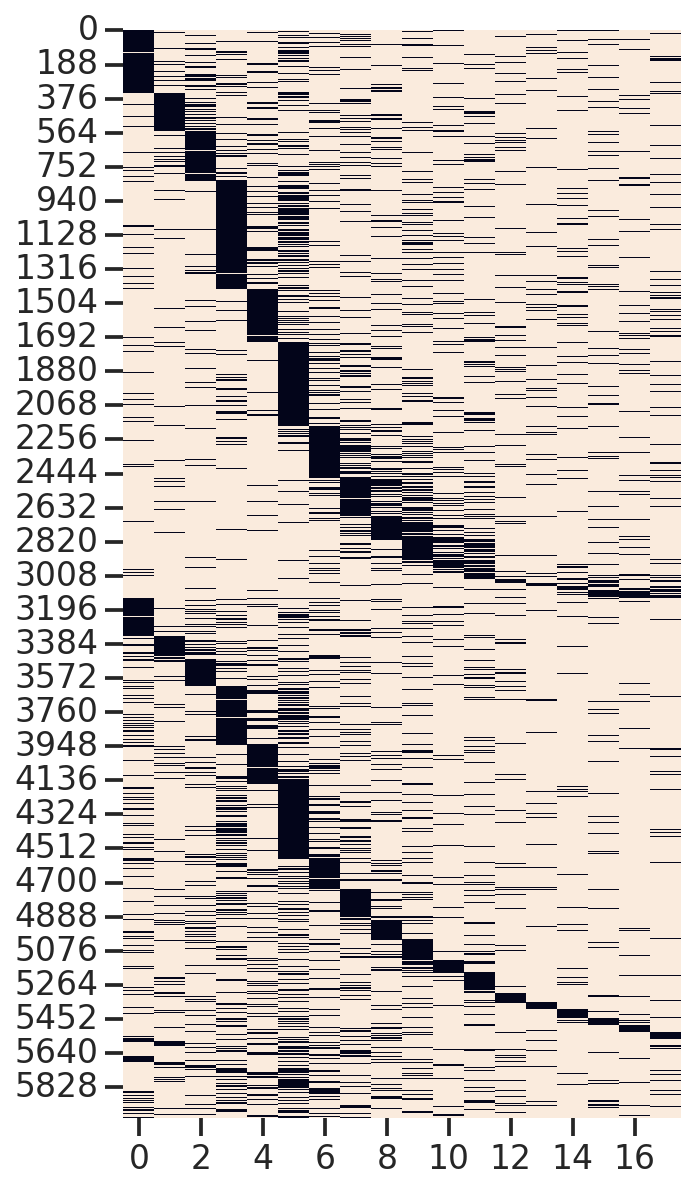

In [24]:
# mat = measured_barcodes[transcripts_idx]
mat = updated_measured_barcodes[transcripts_idx]
print(mat.shape)

fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(mat, cmap='rocket_r', cbar=False, 
            ax=ax)

/home/fangming/anaconda3/envs/mymerfish/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


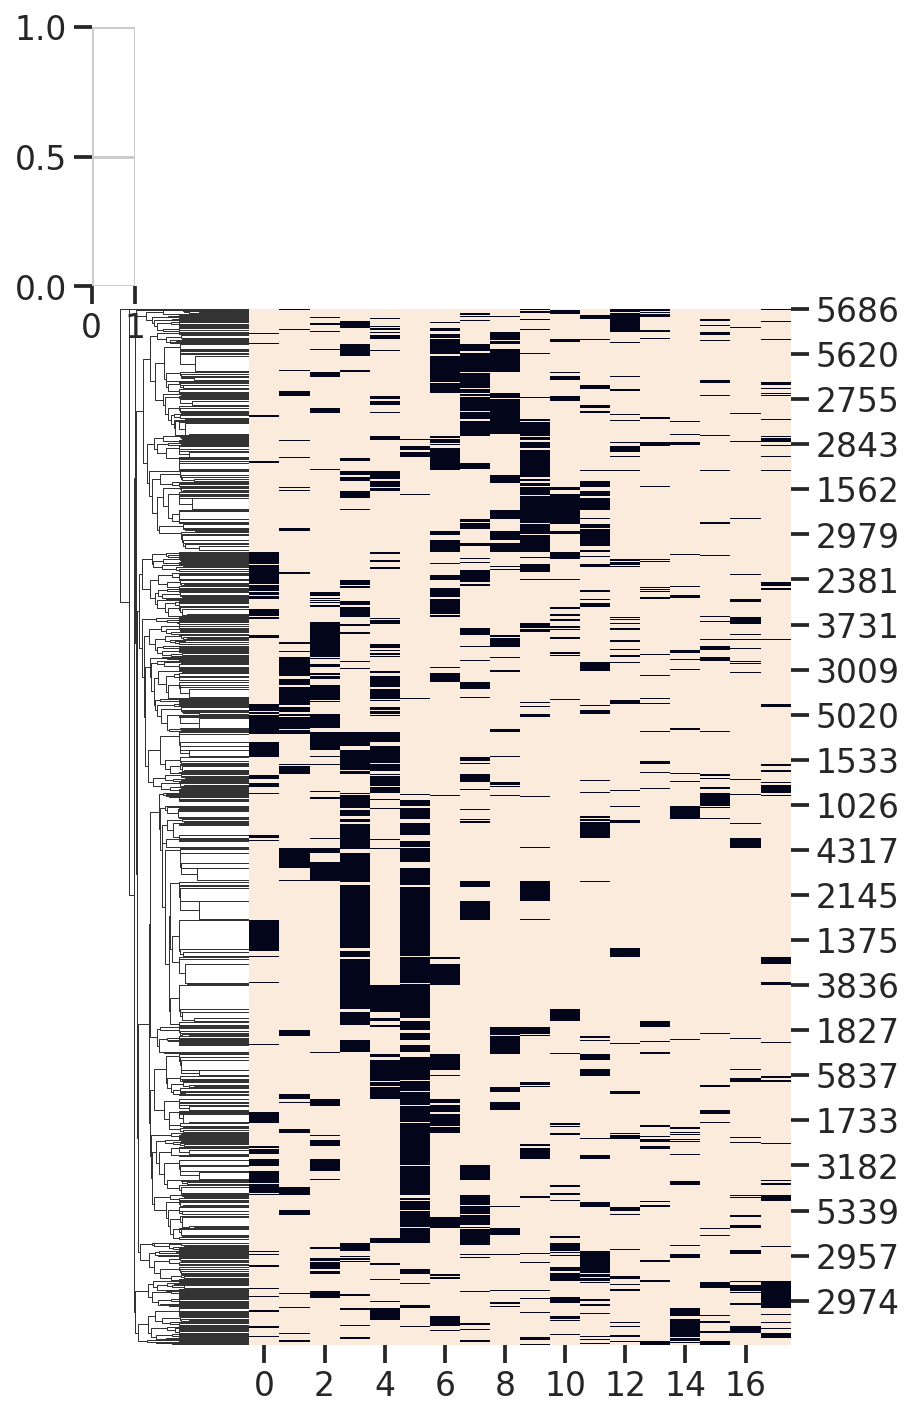

In [25]:
sns.clustermap(mat, cmap='rocket_r', col_cluster=False, figsize=(6,10), cbar=False)
               # cbar=False, 
               #  ax=ax)

In [26]:
mat_unq, counts = np.unique(mat.astype(int), axis=0, return_counts=True)
mat_unq.shape

(954, 18)

<AxesSubplot:>

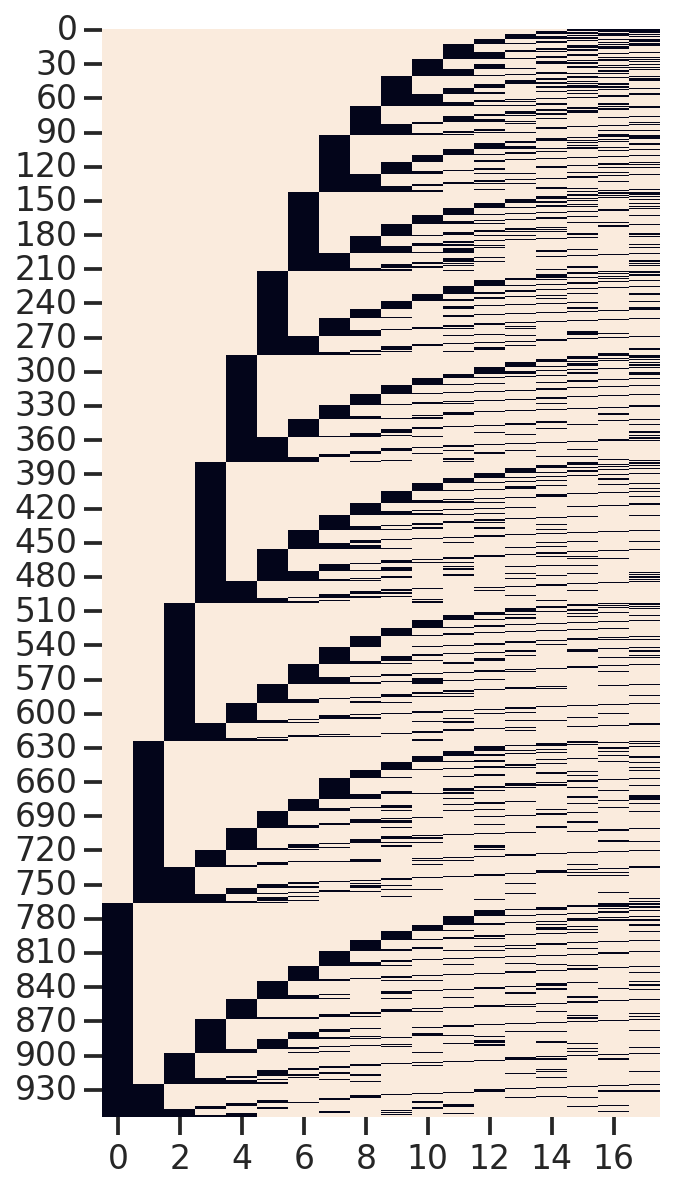

In [27]:
fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(mat_unq, cmap='rocket_r', cbar=False, 
            ax=ax)